<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introducci%C3%B3n_a_netcdf_y_xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción al NetCDF con xarray

Descarga de ficheros de datos

In [19]:
# Datos de temperatura a 2 metros - ERA5 - [1987-2020]  -  res=0.25º
# -------------------------------------------------------------------
ifile = 'era5_t2m_1987_2020_europa_025.rar'
!wget https://owncloud.aemet.es/index.php/s/Ns1t4FXmZoi5hK4/download -O {ifile}
!unrar e {ifile} && rm -f {ifile}

## Datos de temperatura a 2 metros - ERA5 - [1987-2020]  -  res=0.50º
## -------------------------------------------------------------------
#ifile = 'era5_t2m_1987_2020_europa_05.rar''
#!wget https://owncloud.aemet.es/index.php/s/Bxjcb2T5pPq1PYP/download -O {ifile}
#!unrar e era5_t2m_1987_2020_europa_05.rar && rm -f {ifile}

# Datos de temperatura en niveles verticales - ERA5 - [2020]  -  res=0.25º
# -----------------------------------------------------------------------
ifile = 'era5_pl_t_2020_global_025.rar'
!wget https://owncloud.aemet.es/index.php/s/NoAwwclSdzI1A1g/download -O {ifile}
!unrar e {ifile} && rm -f {ifile}

--2023-06-20 16:34:01--  https://owncloud.aemet.es/index.php/s/Ns1t4FXmZoi5hK4/download
Resolving owncloud.aemet.es (owncloud.aemet.es)... 212.128.97.185
Connecting to owncloud.aemet.es (owncloud.aemet.es)|212.128.97.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85238522 (81M) [application/x-rar-compressed]
Saving to: ‘era5_t2m_1987_2020_europa_025.rar’

era5_t2m_1987_2020_ 100%[===================>]  81.29M  1.35MB/s    in 61s     

2023-06-20 16:35:03 (1.33 MB/s) - ‘era5_t2m_1987_2020_europa_025.rar’ saved [85238522/85238522]


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from era5_t2m_1987_2020_europa_025.rar

Extracting  era5_t2m_1987_2020_europa_025.nc                               4%  9% 14% 19% 24% 29% 34% 39% 44% 49% 54% 59% 63% 68% 73% 78% 83% 88% 93% 98% 99%  OK 
All OK
--2023-06-20 16:35:09--  https://owncloud.aemet

Importamos las extensiones xarray y Matplotlib (gráficos)

In [20]:
# Tratamiento de datos multidimensionales
# ------------------------------------------------
import xarray as xr

# Librería gráfica
# -------------------------------
import matplotlib.pyplot as plt

##Lectura de datos
---

En xarray podemos abrir ficheros con la función [open_dataset](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html). El argumento puede ser un fichero local o bien la URL de un servidor remoto OpenDAP. Aquí trabajaremos con un fichero local que contiene 33 años de reanálisis de datos de temperaturas superficial en Europa.

In [21]:
ds = xr.open_dataset('/content/era5_t2m_1987_2020_europa_025.nc')

In [22]:
# Esto es un tipo de dato Dataset
# --------------------------------
ds

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, time: 2484)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1987-01-01T12:00:00 ... 2020-12-28T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-18 18:07:06 GMT by grib_to_netcdf-2.30.2: grib_to_n...

In [23]:
# Variables del Dataset
# ----------------------
ds.data_vars

Data variables:
    t2m      (time, latitude, longitude) float32 ...

In [24]:
# Dimensiones del Dataset
# ------------------------
ds.dims

Frozen({'longitude': 161, 'latitude': 161, 'time': 2484})

In [25]:
# Coordenadas del Dataset
# -----------------------
ds.coords

Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1987-01-01T12:00:00 ... 2020-12-28T12:00:00

Las variables del Dataset son datos de tipo DataArray y se puede acceder ellos de la misma forma que se accede a las columnas en Pandas

In [26]:
# Acceso mediante el nombre entre paréntesis
# -------------------------------------------
ds['t2m']

<xarray.DataArray 't2m' (time: 2484, latitude: 161, longitude: 161)>
[64387764 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1987-01-01T12:00:00 ... 2020-12-28T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [27]:
# Acceso concatenando el nombre con un punto
# -------------------------------------------
ds.t2m

<xarray.DataArray 't2m' (time: 2484, latitude: 161, longitude: 161)>
[64387764 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1987-01-01T12:00:00 ... 2020-12-28T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

##Selección: *isel, sel y slice*
---

xarray se asienta en Numpy y por eso los DataArray comparten métodos y su trato resulta familiar.

In [28]:
# Extracción del DataArray de temperaturas del Dataset
# Los datos están en K y los pasamos a ºC
# ------------------------------------------------------
t2m = ds.t2m - 273.15

In [29]:
# Podemos usar shape para inspeccionar las dimensiones
# ---------------------------------------------------
t2m.shape

(2484, 161, 161)

En Numpy seleccionaríamos elementos del array de esta manera:

In [30]:
# Selección al estilo Numpy, indicando valores o rangos de los índices
# ---------------------------------------------------------------------
t2m[0,10:20,15:25]

<xarray.DataArray 't2m' (latitude: 10, longitude: 10)>
array([[6.45813  , 6.481659 , 6.5122375, 6.546356 , 6.601654 , 6.654602 ,
        6.71109  , 6.766388 , 6.787567 , 6.809906 ],
       [6.4416504, 6.479309 , 6.522827 , 6.564026 , 6.6145935, 6.661682 ,
        6.725189 , 6.786377 , 6.8169556, 6.853424 ],
       [6.420471 , 6.4663696, 6.5240173, 6.608734 , 6.6769714, 6.7322693,
        6.7934265, 6.853424 , 6.8781433, 6.911072 ],
       [6.408722 , 6.476959 , 6.5663757, 6.661682 , 6.759308 , 6.821686 ,
        6.8757935, 6.9169617, 6.936981 , 6.9428406],
       [6.3957825, 6.482849 , 6.581665 , 6.71579  , 6.821686 , 6.8969727,
        6.9487305, 6.988739 , 7.0052185, 7.006378 ],
       [6.402832 , 6.4887085, 6.608734 , 6.7522583, 6.8522644, 6.9428406,
        6.9687195, 7.0228577, 7.040497 , 7.0781555],
       [6.4475403, 6.534607 , 6.654602 , 6.7793274, 6.888733 , 6.982849 ,
        7.0004883, 6.9981384, 7.036957 , 7.0863953],
       [6.505188 , 6.589905 , 6.681671 , 6.774597 , 6.8969727, 7.0228577,
        7.009918 , 6.9957886, 7.0287476, 7.073456 ],
       [6.535797 , 6.628723 , 6.7240295, 6.8193054, 6.8981323, 6.9711   ,
        6.9240417, 6.8558044, 6.904022 , 6.9663696],
       [6.4604797, 6.5675354, 6.672241 , 6.7910767, 6.885193 , 6.861664 ,
        6.808716 , 6.6946106, 6.6651917, 6.6981506]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -26.25 -26.0 -25.75 ... -24.5 -24.25 -24.0
  * latitude   (latitude) float32 57.5 57.25 57.0 56.75 ... 55.75 55.5 55.25
    time       datetime64[ns] 1987-01-01T12:00:00

En xarray disponemos de dos operadores muy cómodos:

*   ***isel*** : selecciona por índices
*   ***sel***  : selecciona por valores

Veamos unos ejemplos seleccionando tiempos (más info [aquí](https://docs.xarray.dev/en/stable/user-guide/time-series.html)):

In [31]:
# Selección de los datos correspondientes al primer valor de tiempo
# -----------------------------------------------------------------
t2m.isel(time=0)

<xarray.DataArray 't2m' (latitude: 161, longitude: 161)>
array([[  5.2075195,   5.295746 ,   5.3334045, ..., -21.171967 ,
        -22.094345 , -22.632004 ],
       [  5.247528 ,   5.3569336,   5.4286804, ..., -21.794342 ,
        -22.155518 , -21.076675 ],
       [  5.322815 ,   5.4298706,   5.519287 , ..., -19.236618 ,
        -18.438965 , -17.120087 ],
       ...,
       [ 20.020813 ,  20.014954 ,  20.183167 , ...,  15.194824 ,
         15.619537 ,  16.172485 ],
       [ 20.08905  ,  20.153778 ,  20.34436  , ...,  15.28775  ,
         15.618347 ,  16.172485 ],
       [ 20.222015 ,  20.300842 ,  20.503174 , ...,  15.608948 ,
         15.904236 ,  16.246613 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 1987-01-01T12:00:00

In [32]:
# Selección de los datos correspondientes a un valor específico del tiempo
# ------------------------------------------------------------------------
t2m.sel(time='1987-02-20T12:00:00')

<xarray.DataArray 't2m' (latitude: 161, longitude: 161)>
array([[ 7.614624 ,  7.6817017,  7.746399 , ..., -2.7726746, -3.8115234,
        -4.4221497],
       [ 7.7252197,  7.769928 ,  7.813446 , ..., -3.5279846, -4.3268433,
        -4.6703796],
       [ 7.8158264,  7.8605347,  7.8946533, ..., -3.4868164, -3.2303467,
        -2.8162231],
       ...,
       [20.889069 , 20.973785 , 21.034973 , ..., 29.998718 , 29.855194 ,
        29.419891 ],
       [20.953796 , 20.998505 , 21.060852 , ..., 30.106964 , 30.169312 ,
        29.734009 ],
       [20.958496 , 21.000854 , 21.026733 , ..., 30.161072 , 30.261078 ,
        30.145782 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 1987-02-20T12:00:00

In [33]:
# ¿Y si el valor específico del tiempo no está presente en los datos?
#  Usamos 'method' para especificar que use el tiempo más próximo.
# -------------------------------------------------------------------------------
#t2m.sel(time='1987-02-18T12:00:00')
t2m.sel(time='1987-02-18T12:00:00',method='nearest')

<xarray.DataArray 't2m' (latitude: 161, longitude: 161)>
array([[ 7.614624 ,  7.6817017,  7.746399 , ..., -2.7726746, -3.8115234,
        -4.4221497],
       [ 7.7252197,  7.769928 ,  7.813446 , ..., -3.5279846, -4.3268433,
        -4.6703796],
       [ 7.8158264,  7.8605347,  7.8946533, ..., -3.4868164, -3.2303467,
        -2.8162231],
       ...,
       [20.889069 , 20.973785 , 21.034973 , ..., 29.998718 , 29.855194 ,
        29.419891 ],
       [20.953796 , 20.998505 , 21.060852 , ..., 30.106964 , 30.169312 ,
        29.734009 ],
       [20.958496 , 21.000854 , 21.026733 , ..., 30.161072 , 30.261078 ,
        30.145782 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 1987-02-20T12:00:00

Para especificar un rango en lugar de un valor concreto usamos la función ***slice***:

In [34]:
# Selección de los datos correspondientes a un periodo de tiempo
# ---------------------------------------------------------------
t2m.sel(time=slice('1987-02-20T12:00:00', '1987-04-16T12:00:00'))

<xarray.DataArray 't2m' (time: 12, latitude: 161, longitude: 161)>
array([[[  7.614624  ,   7.6817017 ,   7.746399  , ...,  -2.7726746 ,
          -3.8115234 ,  -4.4221497 ],
        [  7.7252197 ,   7.769928  ,   7.813446  , ...,  -3.5279846 ,
          -4.3268433 ,  -4.6703796 ],
        [  7.8158264 ,   7.8605347 ,   7.8946533 , ...,  -3.4868164 ,
          -3.2303467 ,  -2.8162231 ],
        ...,
        [ 20.889069  ,  20.973785  ,  21.034973  , ...,  29.998718  ,
          29.855194  ,  29.419891  ],
        [ 20.953796  ,  20.998505  ,  21.060852  , ...,  30.106964  ,
          30.169312  ,  29.734009  ],
        [ 20.958496  ,  21.000854  ,  21.026733  , ...,  30.161072  ,
          30.261078  ,  30.145782  ]],

       [[  6.660492  ,   6.785187  ,   6.784027  , ...,  -4.6233215 ,
          -4.9303894 ,  -5.238617  ],
        [  6.807556  ,   6.836975  ,   6.845215  , ...,  -4.5491943 ,
          -4.8739014 ,  -5.1492004 ],
        [  6.784027  ,   6.811096  ,   6.829895  , ...,  -4.3186035 ,
          -4.5409546 ,  -4.648041  ],
...
        [ 21.792633  ,  21.778503  ,  21.774994  , ...,  34.816498  ,
          34.857666  ,  34.897675  ],
        [ 21.943237  ,  21.88794   ,  21.88794   , ...,  34.362366  ,
          34.54706   ,  34.587067  ],
        [ 22.09616   ,  22.032623  ,  21.980865  , ...,  34.174103  ,
          34.345886  ,  34.425873  ]],

       [[  4.834564  ,   4.8592834 ,   4.886322  , ...,   9.582916  ,
          10.297058  ,  10.50293   ],
        [  4.7804565 ,   4.8498535 ,   4.880432  , ...,   9.566437  ,
          10.24057   ,  10.724121  ],
        [  4.8204346 ,   4.8910217 ,   4.94751   , ...,   9.767639  ,
          10.300568  ,  10.911194  ],
        ...,
        [ 21.289093  ,  21.210266  ,  21.169098  , ...,  27.146881  ,
          27.712769  ,  28.389252  ],
        [ 21.36322   ,  21.316162  ,  21.294983  , ...,  26.995117  ,
          27.581024  ,  28.258667  ],
        [ 21.491455  ,  21.459686  ,  21.473785  , ...,  26.990417  ,
          27.548065  ,  28.139862  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1987-02-20T12:00:00 ... 1987-04-16T12:00:00

In [35]:
# Selección de los datos correspondientes a un periodo de tiempo
# especificando solo mes y año
# ---------------------------------------------------------------
t2m.sel(time=slice('1993-07', '1994-02'))

<xarray.DataArray 't2m' (time: 49, latitude: 161, longitude: 161)>
array([[[ 8.088776 ,  8.106415 ,  8.118164 , ..., 20.37613  ,
         20.667908 , 20.056122 ],
        [ 8.193481 ,  8.196991 ,  8.189941 , ..., 19.921997 ,
         20.523193 , 21.243195 ],
        [ 8.207581 ,  8.21228  ,  8.208771 , ..., 20.123169 ,
         20.764374 , 21.537323 ],
        ...,
        [23.249146 , 23.204437 , 23.167969 , ..., 38.54953  ,
         38.79422  , 39.183655 ],
        [23.320892 , 23.259735 , 23.237366 , ..., 38.53659  ,
         38.857758 , 39.247192 ],
        [23.3656   , 23.299713 , 23.262085 , ..., 38.670685 ,
         38.966003 , 39.28131  ]],

       [[ 6.885193 ,  6.936981 ,  7.008728 , ..., 17.57724  ,
         17.59488  , 17.026642 ],
        [ 7.1099243,  7.1546326,  7.193451 , ..., 17.549011 ,
         17.769012 , 17.985474 ],
        [ 7.313446 ,  7.3593445,  7.3828735, ..., 17.549011 ,
         17.678406 , 17.899597 ],
...
        [19.641998 , 19.582    , 19.538452 , ..., 20.476135 ,
         20.818481 , 21.231445 ],
        [19.660828 , 19.60199  , 19.569061 , ..., 20.236115 ,
         20.544373 , 20.958496 ],
        [19.691406 , 19.637299 , 19.637299 , ..., 20.11493  ,
         20.406708 , 20.729065 ]],

       [[ 6.411072 ,  6.4134216,  6.3746033, ..., -6.9245605,
         -6.542206 , -6.4492493],
        [ 6.3428345,  6.3628235,  6.3957825, ..., -7.4563293,
         -7.0727844, -6.6633606],
        [ 6.379303 ,  6.405182 ,  6.46402  , ..., -7.0645447,
         -6.9033813, -6.4092407],
        ...,
        [20.765533 , 20.802032 , 20.814972 , ..., 24.976227 ,
         24.65271  , 24.424469 ],
        [20.787903 , 20.785553 , 20.797302 , ..., 25.483307 ,
         25.092712 , 24.863312 ],
        [20.799652 , 20.793793 , 20.787903 , ..., 26.012726 ,
         25.592712 , 25.191528 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1993-07-03T12:00:00 ... 1994-02-28T12:00:00

Las funciones ***sel***, ***isel*** y ***slice*** funcionan exactamente igual con el resto de coordenadas. Algunos ejemplos con la latitud y la longitud:

In [36]:
# Selección de una ventana geográfica:
# norte = 40º sur = 30º / oeste = -30º / este = 0º
# Nota: en ERA5 las latitudes se almanenan invertidas
# --------------------------------------------------------
t2m.sel(latitude=slice(40,30), longitude=slice(-20,0))

<xarray.DataArray 't2m' (time: 2484, latitude: 41, longitude: 81)>
array([[[16.747803 , 16.713684 , 16.678375 , ..., 16.468964 ,
         16.956055 , 16.04309  ],
        [16.856049 , 16.82779  , 16.82544  , ..., 17.447815 ,
         16.858398 , 14.586578 ],
        [16.960754 , 16.939575 , 16.938385 , ..., 13.866547 ,
         13.039459 , 12.844177 ],
        ...,
        [18.10196  , 17.985474 , 17.890167 , ..., 10.289978 ,
         10.414703 , 10.477051 ],
        [18.180786 , 18.07135  , 17.947845 , ..., 10.473541 ,
         10.690002 , 10.791168 ],
        [18.31137  , 18.172546 , 18.038422 , ..., 10.794708 ,
         11.092377 , 11.198242 ]],

       [[16.032501 , 16.133667 , 16.161896 , ..., 14.215973 ,
         15.852478 , 15.710114 ],
        [16.098358 , 16.29956  , 16.344269 , ..., 16.213684 ,
         16.365448 , 14.306549 ],
        [16.443085 , 16.540741 , 16.54309  , ..., 13.740662 ,
         13.513611 , 13.093597 ],
...
        [19.907867 , 19.987885 , 20.026703 , ..., 15.186584 ,
         15.31131  , 15.29364  ],
        [19.996124 , 20.044342 , 20.030243 , ..., 15.391296 ,
         15.468933 , 15.4913025],
        [20.050232 , 20.053772 , 20.09024  , ..., 15.644257 ,
         15.770142 , 15.776001 ]],

       [[12.879456 , 12.902985 , 12.822998 , ...,  9.813507 ,
         12.593567 , 14.877167 ],
        [13.046539 , 13.040649 , 12.995941 , ..., 13.02301  ,
         14.338318 , 14.348907 ],
        [13.200653 , 13.217133 , 13.199463 , ..., 14.03949  ,
         14.677155 , 14.304199 ],
        ...,
        [18.82196  , 18.892548 , 19.014923 , ..., 14.575989 ,
         14.591278 , 14.5277405],
        [19.257263 , 19.278442 , 19.263153 , ..., 14.643036 ,
         14.607758 , 14.54657  ],
        [19.509033 , 19.513763 , 19.456116 , ..., 14.751282 ,
         14.723053 , 14.634796 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... -0.5 -0.25 0.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 30.5 30.25 30.0
  * time       (time) datetime64[ns] 1987-01-01T12:00:00 ... 2020-12-28T12:00:00

In [37]:
# isel y sel admiten múltiples selectores simultáneos
# Selección de datos en una fecha específica y en una ventana geográfica:
# ---------------------------------------------------------------------------------------
t2m.sel(time='1987-02-20T12:00:00',latitude=slice(40,30), longitude=slice(-20,0))

<xarray.DataArray 't2m' (latitude: 41, longitude: 81)>
array([[14.79129  , 14.887756 , 14.941864 , ...,  4.3792725,  7.268738 ,
         8.847595 ],
       [14.80658  , 14.931274 , 15.014832 , ...,  7.667572 ,  8.594666 ,
         7.874634 ],
       [14.846588 , 15.085419 , 15.191284 , ...,  8.114655 ,  8.404053 ,
         7.7099304],
       ...,
       [18.544312 , 18.510193 , 18.472565 , ..., 12.78418  , 12.895935 ,
        12.875946 ],
       [18.59961  , 18.60196  , 18.532562 , ..., 13.152405 , 13.208893 ,
        13.194763 ],
       [18.640778 , 18.58078  , 18.521973 , ..., 13.477142 , 13.618317 ,
        13.644196 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... -0.5 -0.25 0.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 30.5 30.25 30.0
    time       datetime64[ns] 1987-02-20T12:00:00

In [38]:
# También pueden encadenarse y funcionan igualemente con Datasets
# ---------------------------------------------------------------
ds.isel(time=0).sel(latitude=slice(40,30), longitude=slice(-20,0))

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 41)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... -0.5 -0.25 0.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 30.5 30.25 30.0
    time       datetime64[ns] 1987-01-01T12:00:00
Data variables:
    t2m        (latitude, longitude) float32 289.9 289.9 289.8 ... 284.2 284.3
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-18 18:07:06 GMT by grib_to_netcdf-2.30.2: grib_to_n...

##Gráficos
---

xarray tiene una prestación muy cómoda en relación con los gráficos: intenta deducir a partir de las dimensiones de los datos qué tipo de dibujo queremos.

Por ejemplo si eliminamos la dimensión temporal, la función *plot()* representará un mapa.

Notas:

* cmap = 'jet' especifica un mapa de color. Más opciones [aquí](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
* El ajuste de la escala de color es automático pero podemos usar los argumentos vmn/vmax para ajustarlos.

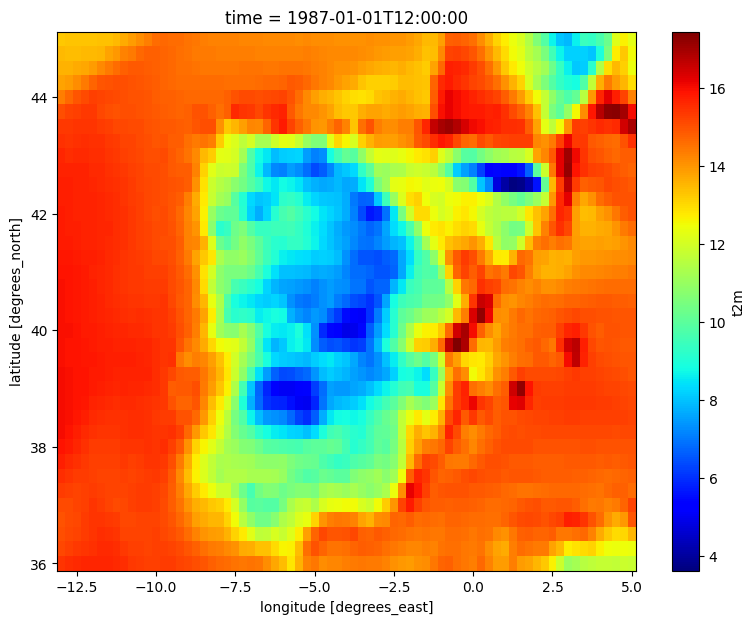

In [39]:
# Seleccionamos un tiempo y una ventana geográfica  f(x,y,t) --> f=f(x,y)
# ------------------------------------------------------------------------
t2m.isel(time=0).sel(latitude = slice(45,36) , longitude = slice(-13,5)).plot(cmap = 'jet', size = 7)

(array([3.25000e+02, 4.60800e+03, 3.25080e+04, 1.45439e+05, 2.60790e+05,
        1.44874e+05, 6.06200e+04, 2.29800e+04, 3.07700e+03, 2.90000e+01]),
 array([-8.24459839, -2.88693547,  2.47072744,  7.8283906 , 13.18605328,
        18.54371643, 23.90137863, 29.25904274, 34.61670685, 39.97436905,
        45.33203125]),
 <BarContainer object of 10 artists>)

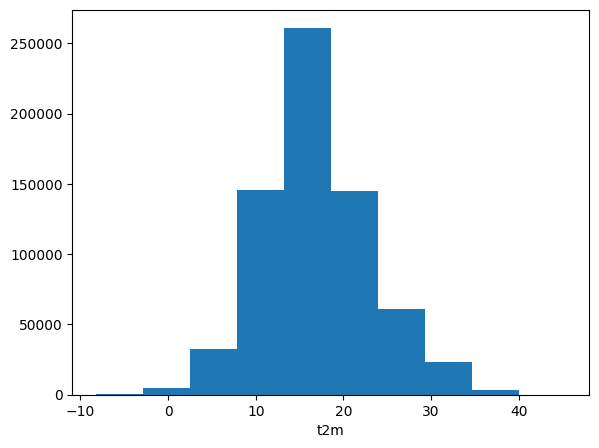

In [40]:
# Seleccionamos rangos de las tres variables:  f(x,y,t) --> f=f(x,y,t)
# -----------------------------------------------------------------------------------------------------
t2m.sel(time=slice('2001-01','2004-05'), latitude=slice(45,36), longitude=slice(-13,5)).plot(size=5)


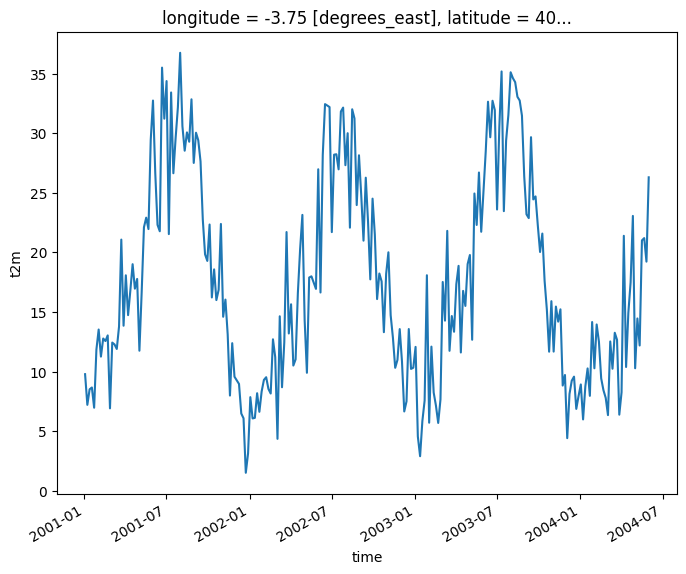

In [41]:
# Seleccionamos un rango de tiempos y las coordenadas de un punto:  f(x,y,t) --> f=f(t)
# ----------------------------------------------------------------------------------------
t2m.sel(time=slice('2001-01','2004-05')).sel(latitude=40.4,longitude=-3.7,method = 'nearest').plot(size=6)

**Sobre la personalización de los gráficos**: la función *plot()* admite varios argumentos que permiten hacer ajustes en los gráficos (más info [aquí](https://docs.xarray.dev/en/stable/user-guide/plotting.html)). Una alternativa sencilla pasa por crear un contenedor y pasar los ejes como argumento a *plot()*:

Text(0.5, 1.0, 'Evolución de la temperatura a 2m en el periodo 2001-2005, en Madrid')

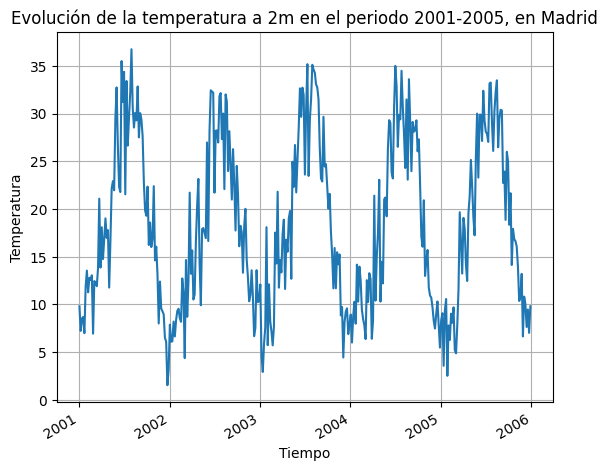

In [42]:
# Creamos una figura
# --------------------
fig, ax = plt.subplots()

# Pasamos los ejes como argumento
# ----------------------------------
t2m.sel(time=slice('2001-01','2005-12')).sel(latitude=40.4, longitude=-3.7, method = 'nearest').plot(ax=ax)

# Personalizamos el gráfico añadiendo elementos
# ----------------------------------------------
ax.grid(True)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax.set_title('Evolución de la temperatura a 2m en el periodo 2001-2005, en Madrid')

Veamos un ejemplo con un fichero que contiene además una coordenada vertical.

In [43]:
# Leemos el fichero
# --------------------
ds = xr.open_dataset('/content/era5_pl_t_2020_global_025.nc')

In [44]:
# Dataset
# ----------
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 16, time: 2)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 2020-08-01T12:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-18 07:22:25 GMT by grib_to_netcdf-2.30.2: grib_to_n...

In [45]:
# Extraemos el DataArray de temperaturas temp = temp(t,x,y,z)
# Pasamos de Kelvin a ºC
# -------------------------------------------------------------
t = ds.t - 273.15

t

<xarray.DataArray 't' (time: 2, level: 16, latitude: 721, longitude: 1440)>
array([[[[-42.714798  , -42.714798  , -42.714798  , ..., -42.714798  ,
          -42.714798  , -42.714798  ],
         [-42.671432  , -42.669632  , -42.667816  , ..., -42.67505   ,
          -42.67505   , -42.67325   ],
         [-42.698547  , -42.69673   , -42.693115  , ..., -42.70938   ,
          -42.705765  , -42.70215   ],
         ...,
         [-35.193405  , -35.193405  , -35.195206  , ..., -35.19159   ,
          -35.19159   , -35.19159   ],
         [-35.27832   , -35.27832   , -35.27832   , ..., -35.276505  ,
          -35.276505  , -35.27832   ],
         [-35.505966  , -35.505966  , -35.505966  , ..., -35.505966  ,
          -35.505966  , -35.505966  ]],

        [[-38.382263  , -38.382263  , -38.382263  , ..., -38.382263  ,
          -38.382263  , -38.382263  ],
         [-38.34433   , -38.34253   , -38.340714  , ..., -38.347946  ,
          -38.34613   , -38.34433   ],
         [-38.34613   , -38.34433   , -38.338913  , ..., -38.35698   ,
          -38.353363  , -38.349747  ],
...
         [-34.14189   , -34.12744   , -34.112976  , ..., -34.187057  ,
          -34.172607  , -34.158142  ],
         [-33.91063   , -33.901596  , -33.894363  , ..., -33.935913  ,
          -33.928696  , -33.919662  ],
         [-34.64055   , -34.64055   , -34.64055   , ..., -34.64055   ,
          -34.64055   , -34.64055   ]],

        [[  0.33947754,   0.33947754,   0.33947754, ...,   0.33947754,
            0.33947754,   0.33947754],
         [  0.36294556,   0.36294556,   0.36294556, ...,   0.35934448,
            0.35934448,   0.35934448],
         [  0.38101196,   0.3828125 ,   0.3828125 , ...,   0.37921143,
            0.37921143,   0.38101196],
         ...,
         [-32.97293   , -32.95848   , -32.942215  , ..., -33.019913  ,
          -33.005463  , -32.989197  ],
         [-32.729034  , -32.72      , -32.71277   , ..., -32.75432   ,
          -32.7471    , -32.738068  ],
         [-33.487854  , -33.487854  , -33.487854  , ..., -33.487854  ,
          -33.487854  , -33.487854  ]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 2020-08-01T12:00:00

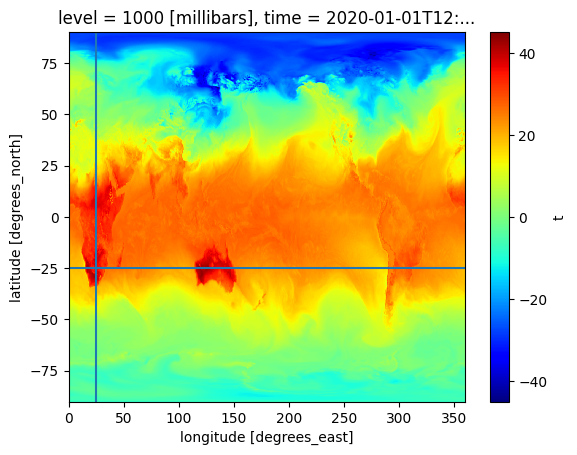

In [46]:
# Extraemos el mapa correspondiente al primer valor de tiempo y al último nivel de presión (1000 hPa)
# Trazamos un paralelo y un meridiano para los cortes verticales
# -----------------------------------------------------------------
fig,ax = plt.subplots()
t.isel(time=0).isel(level=-1).plot(cmap='jet', ax=ax)
ax.axhline(y=-25)
ax.axvline(x=25)

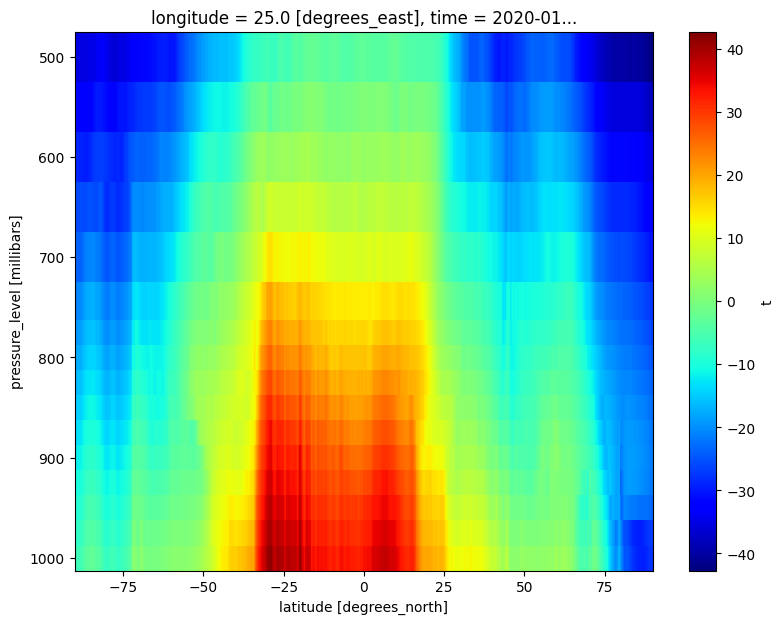

In [47]:
# Corte vertical por un meridiano que pasa por África
# --------------------------------------------------------
t.isel(time=0).sel(longitude=25,method='nearest').plot(cmap='jet',yincrease=False,size=7)

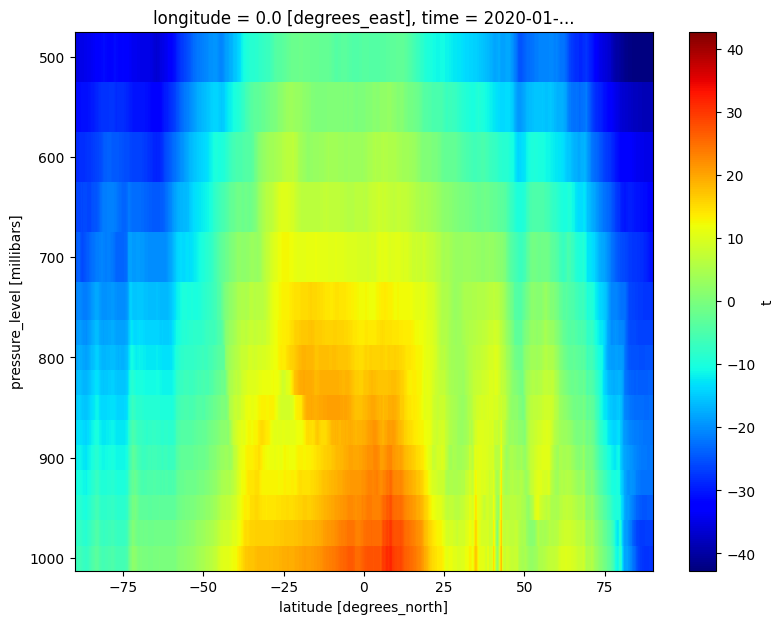

In [48]:
# Corte vertical por un paralelo en la latitud de Australia
# Especificamos que la coordenada vertical disminuye con la altura con yincrease=False
# --------------------------------------------------------------------------------------
t.isel(time=0).sel(longitude=-25,method='nearest').plot(cmap='jet',yincrease=False,size=7)

##Estadística
---

En xarray podemos usar las mismas funciones estadísticas que tenemos en Numpy

In [49]:
# Volvemos a abrir el fichero de temperaturas en superficie
# -------------------------------------------------------------
ds = xr.open_dataset('/content/era5_t2m_1987_2020_europa_025.nc')

# Inspeccionamos el contenido
# ----------------------------
ds

# Extraemos el DataArray y pasamos de Kelvin a ºC
# ------------------------------------------------
t2m = ds.t2m - 273.15

In [50]:
# Métodos de numpy para estadística
# -----------------------------------
# Valor medio
# -----------------
media = t2m.mean()

# El resultado es un DataArray
# ----------------------------
print(media)

# Extracción del valor de
# un DataArray de un solo elemento
# -----------------------------------
print(media.item())

<xarray.DataArray 't2m' ()>
array(17.981556, dtype=float32)
17.981555938720703


In [51]:
# Análogamente para otras funciones estadísticas
# -----------------------------------------------
d = {
    'dev_std'            :  t2m.std(),
    'varianza'           :  t2m.var(),
    'mediana'            :  t2m.median(),
    'percentil5'         :  t2m.quantile(0.05),
    'percentil95'        :  t2m.quantile(0.95),
    'minimo'             :  t2m.min(),
    'maximo'             :  t2m.max(),
}

for stat in d :
  print('%s = %.3f' % (stat, d[stat].item()))

dev_std = 8.679
varianza = 75.321
mediana = 16.941
percentil5 = 6.112
percentil95 = 36.720
minimo = -27.300
maximo = 49.799


Las funciones estadísticas pueden usarse sobre dimensiones diferentes si se especifican con el argumento ***dim***:

In [52]:
# Estructura de t2m
# -----------------
t2m.coords

Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 1987-01-01T12:00:00 ... 2020-12-28T12:00:00

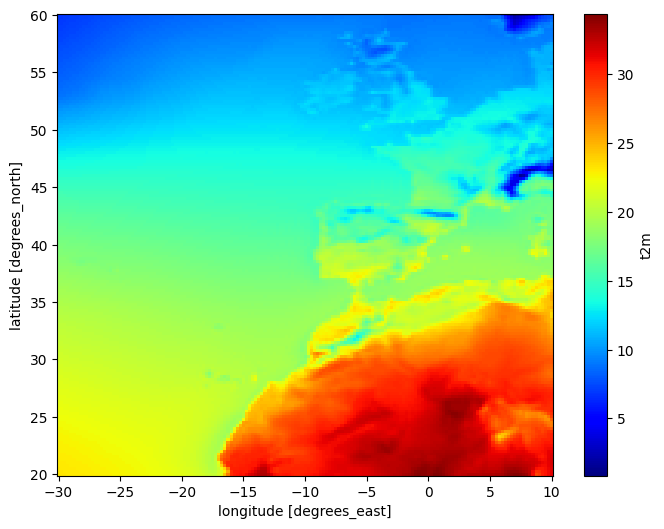

In [53]:
# Media temporal de temperaturas
# ------------------------------
t2m.mean(dim='time').plot(cmap='jet', size=6)

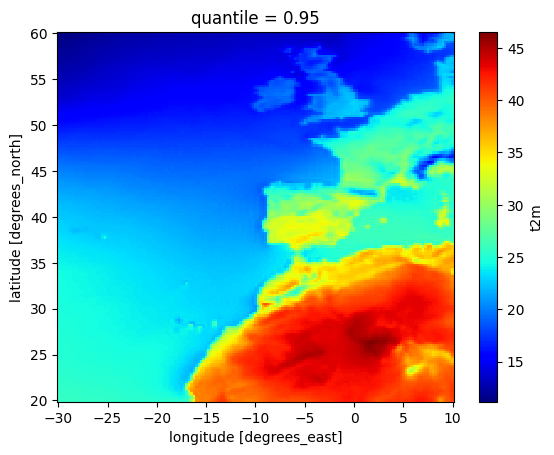

In [54]:
# El percentil 95 es el valor que solo es superado por un 5% de los datos
# -----------------------------------------------------------------------
t2m.quantile(0.95,dim='time').plot(cmap='jet')

Text(0.5, 0.98, 'Temperaturas en superficie')

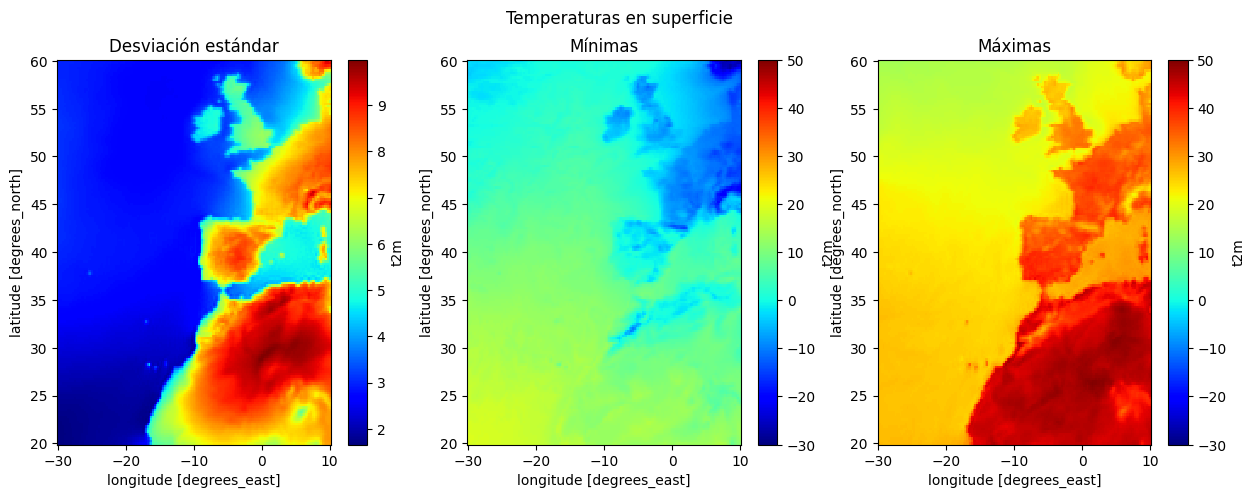

In [55]:
# La desviación estándar mide la dispersión en torno al valor medio
# ---------------------------------------------------------------------
fig,ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

t2m.std(dim='time').plot(ax=ax[0], cmap='jet')
ax[0].set_title('Desviación estándar')

t2m.min(dim='time').plot(ax=ax[1], cmap='jet', vmin=-30,vmax=50)
ax[1].set_title('Mínimas')

t2m.max(dim='time').plot(ax=ax[2], cmap='jet', vmin=-30,vmax=50)
ax[2].set_title('Máximas')

# Título superior
# ----------------
plt.suptitle('Temperaturas en superficie')

Vamos a calcular una climatología. Siguiendo la recomendación de la Organización Meteorológica Mundial tomaremos un periodo de 30 años como referencia (1981-2010).

In [56]:
# Promediamos todos los mapas en la ventana de tiempo 1981-2010
# ---------------------------------------------------------------
clim = t2m.sel(time=slice('1981-01','2010-12')).mean(dim='time')
clim

<xarray.DataArray 't2m' (latitude: 161, longitude: 161)>
array([[ 6.7028284,  6.765172 ,  6.8227873, ...,  7.298365 ,  7.496735 ,
         7.291659 ],
       [ 6.7980285,  6.8606677,  6.9117966, ...,  7.266926 ,  7.598281 ,
         7.9981894],
       [ 6.870781 ,  6.9331365,  6.9819503, ...,  7.6463847,  7.9908223,
         8.535211 ],
       ...,
       [23.157469 , 23.1309   , 23.108648 , ..., 30.545    , 30.916103 ,
        31.350885 ],
       [23.194838 , 23.160643 , 23.145567 , ..., 30.451704 , 30.821587 ,
        31.257038 ],
       [23.227037 , 23.193731 , 23.176817 , ..., 30.476856 , 30.825928 ,
        31.177511 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0

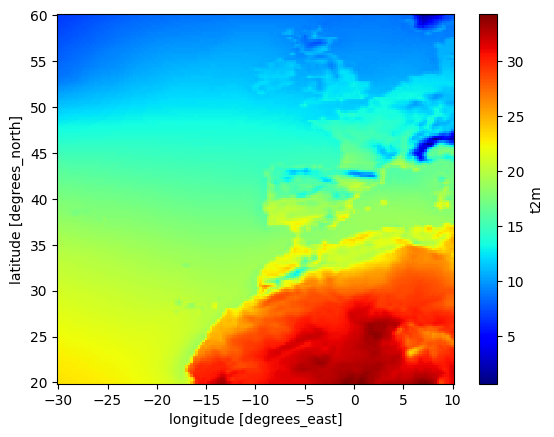

In [57]:
# Dibujamos
# ------------------
clim.plot(cmap='jet')

En la función ***sel*** podemos añadir condiciones para restringir el periodo especificado con la función ***slice***. Por ejemplo, si quisiéramos la climatología del mes de agosto haríamos lo siguiente:

In [66]:
# Climatología del mes de agosto en el periodo 1981-2010
# ---------------------------------------------------------
clim_agosto = t2m.sel(time = slice('1981-01','2010-12') and t2m.time.dt.month.isin([8,])).mean(dim='time')


Ahora podemos calcular las anomalías correspondientes a un día de agosto cualquiera sin más que sustraer la climatología:

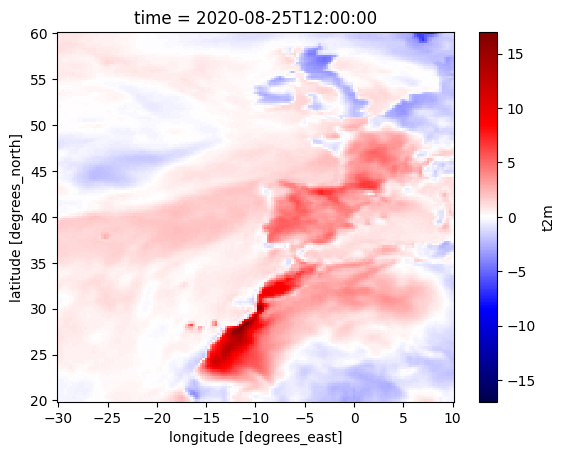

In [67]:
# Calcula la anomalía del 25/08/2020 restando la climatología de agosto en el periodo [1981-2010]
# -------------------------------------------------------------------------------------------------
(t2m.sel(time='2020-08-25T12:00:00') - clim_agosto).plot(cmap='seismic')


Calculamos ahora la anomalía anual

In [68]:
# Calcula la anomalías de todos los días restando a cada un la climatología anual del periodo [1981-2010]
# -------------------------------------------------------------------------------------.-----------------
anom = t2m - clim

Promediando todos los datos de cada mapa podemos generar una serie temporal de anomalías:

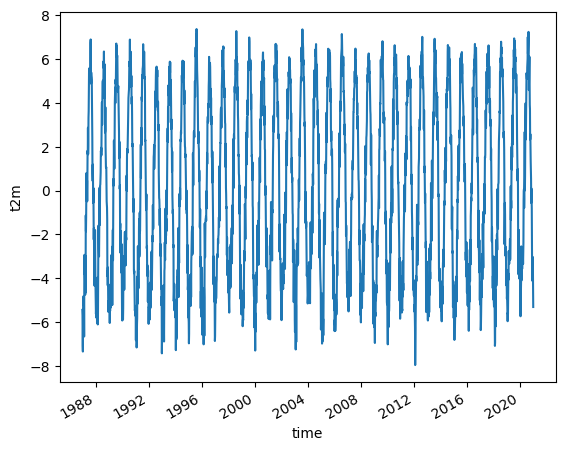

In [69]:
# Calcula la serie temporal de anomalías y la representa
# -------------------------------------------------------
anom.mean(dim=('longitude','latitude')).plot()

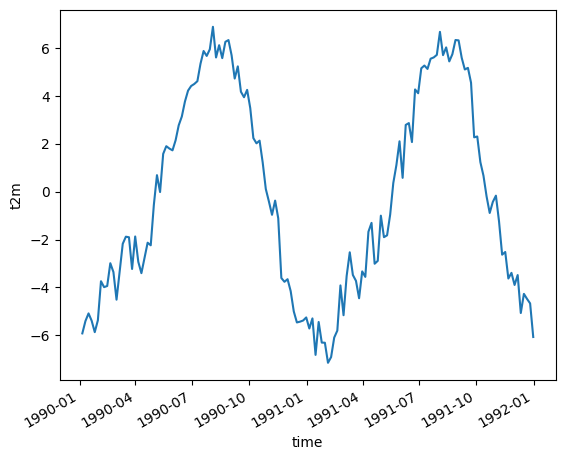

In [72]:
anom.sel(time=slice('1990-01','1991-12')).mean(dim=('longitude','latitude')).plot()

##Remuestreo
---

Nuestras anomalías de temperatura contienen la variación natural del ciclo estacional. Eso dificulta cualquier diagnóstico de evolución de largo plazo. Necesitaríamos empaquetar todos los datos de cada año y promediarlos. Podemos realizar esa operación con la función ***resample()***.

* Es muy flexible y acepta periodos del tipo "2W", "3M" o "5Y" para muestrear cada 2 semanas, 3 meses o cinco años, por ejemplo.
* Más info sobre "alias" de tiempo [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases8) para usar con ***resample()***

In [78]:
# Remuestreamos la serie temporal original sustituyendo
# los valores de cada año por su promedio
# ------------------------------------------------------
anom_anual = anom.resample(time='Y').mean(dim='time')
anom_anual.time

<xarray.DataArray 'time' (time: 34)>
array(['1987-12-31T00:00:00.000000000', '1988-12-31T00:00:00.000000000',
       '1989-12-31T00:00:00.000000000', '1990-12-31T00:00:00.000000000',
       '1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1987-12-31 1988-12-31 ... 2020-12-31

En estas condiciones resulta más fácil diagnosticar un cambio de largo plazo:

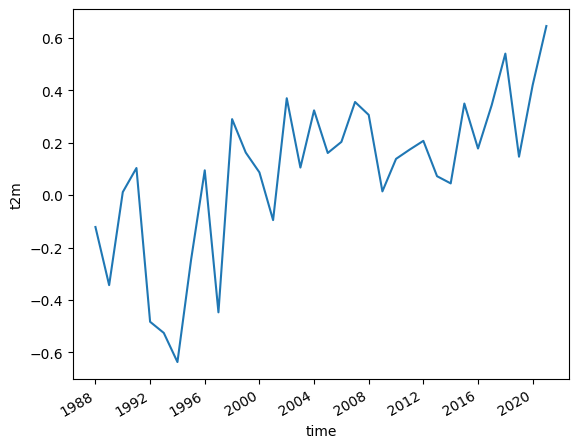

In [79]:
anom_anual.mean(dim=('longitude','latitude')).plot()

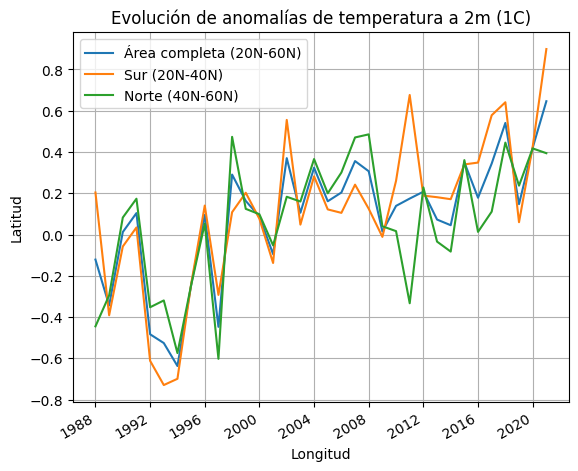

In [80]:
# Un ejemplo de evolución de anomalías en regiones distintas sobre un
# mismo gráfico
# ---------------------------------------------------------------------
fig,ax = plt.subplots()

anom_anual.mean(dim=('longitude','latitude')).plot(ax=ax,label='Área completa (20N-60N)')
anom_anual.sel(latitude=slice(40,20)).mean(dim=('longitude','latitude')).plot(ax=ax,label='Sur (20N-40N)')
anom_anual.sel(latitude=slice(60,40)).mean(dim=('longitude','latitude')).plot(ax=ax,label='Norte (40N-60N)')
ax.set_title('Evolución de anomalías de temperatura a 2m (1C)')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.grid(True)
ax.legend()


##Agrupamientos
---

Los agrupamientos permiten aplicar a los datos una estrategia de "dividir-aplicar-combinar":
* se realiza una separación por grupos en base a algún criterio,
* se aplica alguna operación sobre cada grupo
* se vuelven a recombinar los grupos

Podemos hacer agrupamientos con las funciones ***groupby_bin()*** y ***groupby()***

In [87]:
for i,d in anom_anual.groupby_bins('latitude', bins=4) :
    print(i,d.dims,d.shape)

(50.0, 60.0] ('time', 'latitude', 'longitude') (34, 40, 161)
(40.0, 50.0] ('time', 'latitude', 'longitude') (34, 40, 161)
(30.0, 40.0] ('time', 'latitude', 'longitude') (34, 40, 161)
(19.96, 30.0] ('time', 'latitude', 'longitude') (34, 41, 161)


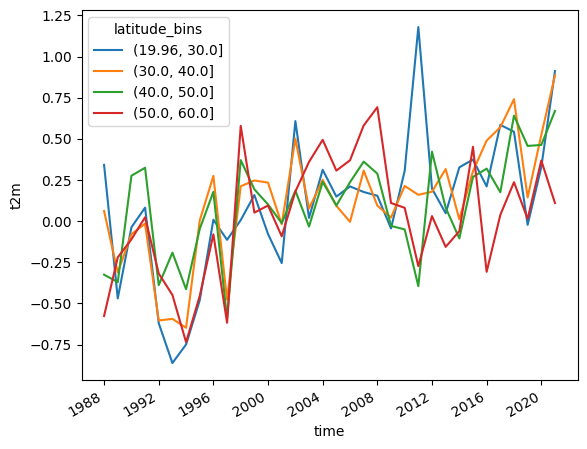

In [88]:
anom_anual.groupby_bins('latitude', bins=4).mean(dim=('longitude','latitude')).plot(x='time', hue='latitude_bins')

Con la función groupby() podemos especificar otros criterios para el agrupamiento. En este ejemplo vamos a generar mapas promedio de temperatura superficial para cada estación del año.

* Más "coordenadas virtuales de tiempo" [aquí](https://docs.xarray.dev/en/stable/user-guide/time-series.html)


In [ ]:
# Generamos un grupo con los datos de temperatura correspondientes a cada
# estación (DJF/MAM/JJA/SON) y a continuación promediamos cada grupo
# -----------------------------------------------------------------------------------------
estaciones = t2m.groupby('time.season').mean(dim='time')
print(estaciones)

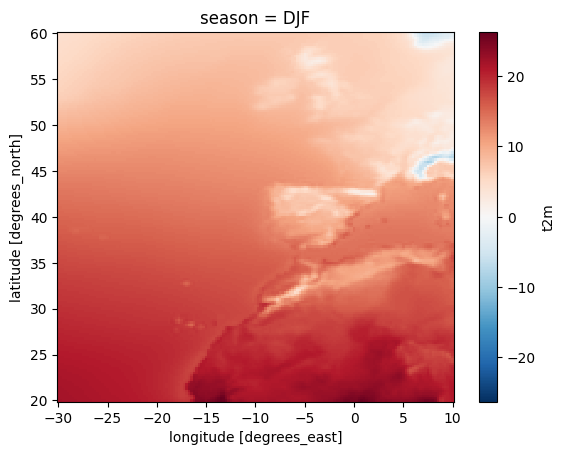

In [94]:
# Dibujamos el primer miembro del grupo
# ----------------------------------------
estaciones[0].plot()

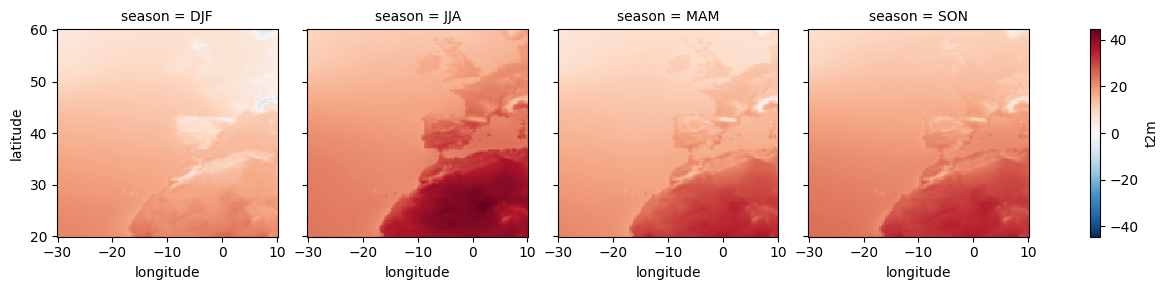

In [96]:
estaciones.plot(col='season')

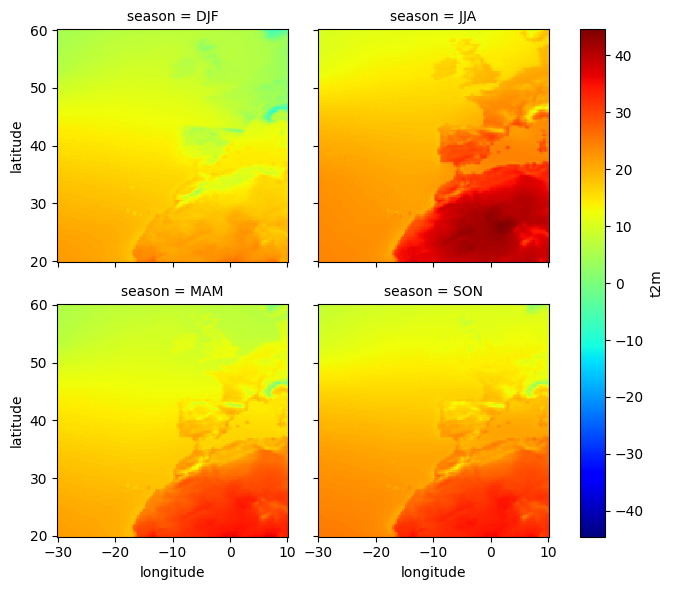

In [97]:
estaciones.plot(col='season',col_wrap=2,cmap='jet')

Un ejemplo con mapas mensuales

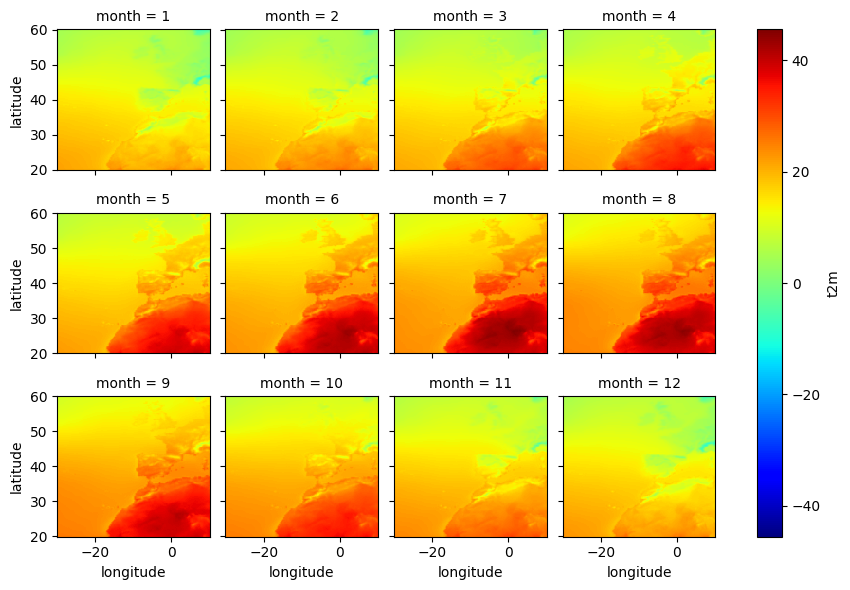

In [102]:
t2m.groupby('time.month').mean(dim='time').plot(col='month',col_wrap=4,cmap='jet',size=2)

##Máscaras
---

##Múltiples fuentes
---

##Salida en NetCDF
---